In [14]:
%reload_ext jupyter-rdfify

In [15]:
# This cell defines some helpers, imports and strings for tests. Run it!
from rdflib import Variable, URIRef, Literal, XSD
s = "http://example.org/subjects#{}"
p = "http://example.org/properties#{}"
c = "http://example.org/classes#{}"
lab = "http://www.w3.org/2000/01/rdf-schema#label"
err = "Your query gave no result."
ex = "http://example.org/{}"

def project(bindings, variables):
    result = list()
    for binding in bindings:
        result.append(binding.project(variables))
    return result

def bindingToString(binding):
    res = ""
    for var in binding:
        res += f"{var.n3()} -> {binding[var].n3()}\n"
    return res

def lenCheck(bindings, length, msg=None):
    assert len(bindings) == length, \
        f"Your query returned the wrong number of results. It returned {len(bindings)} but should have returned {length}.\n" \
        + (msg if msg is not None else "")
    
def exCheck(bindings, binding):
    assert binding in bindings, \
        f"Your result is missing the following binding:\n{bindingToString(binding)}"
    
def bindCheck(bindings, pos, binding):
    assert(bindings[pos] == binding), \
        f"""The result of your query has the wrong binding in position {pos}.
            Expected binding:\n{bindingToString(binding)}
            Your binding:\n{bindingToString(bindings[pos])}"""
    
def uri(prefix, name):
    return URIRef(prefix.format(name))

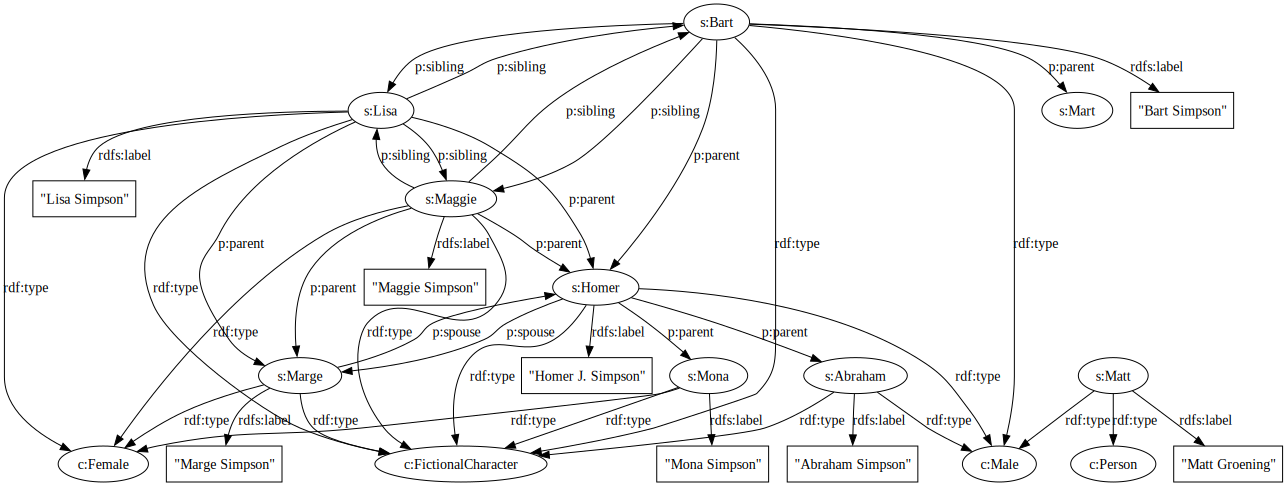

In [37]:
%%rdf turtle -l Simpsons
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>

s:Homer a c:FictionalCharacter, c:Male ;
	p:spouse s:Marge ;
	p:parent s:Abraham ;
	p:parent s:Mona ;
	rdfs:label "Homer J. Simpson" .
s:Marge a c:FictionalCharacter, c:Female ;
	p:spouse s:Homer ;
	rdfs:label "Marge Simpson" .
s:Bart a c:FictionalCharacter, c:Male ;
    p:parent s:Homer ;
	p:parent s:Mart ;
	p:sibling s:Lisa ;
	p:sibling s:Maggie ;
	rdfs:label "Bart Simpson" .
s:Lisa a c:FictionalCharacter, c:Female ;
    p:parent s:Homer ;
    p:parent s:Marge ;
    p:sibling s:Bart ;
    p:sibling s:Maggie ;
    rdfs:label "Lisa Simpson" .
s:Maggie a c:FictionalCharacter, c:Female ;
    p:parent s:Homer ;
    p:parent s:Marge ;
    p:sibling s:Bart ;
    p:sibling s:Lisa ;
    rdfs:label "Maggie Simpson" .
s:Mona a c:FictionalCharacter, c:Female ;
    rdfs:label "Mona Simpson" .
s:Abraham a c:FictionalCharacter, c:Male ;
    rdfs:label "Abraham Simpson" .
s:Matt a c:Person, c:Male ;
    rdfs:label "Matt Groening" .

In [38]:
%%rdf sparql --prefix
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>
PREFIX ex: <http://example.org/> 

SPARQL: Stored prefix.


### 1.Who are Homer Simpson's parents?

In [40]:
%%rdf sparql -l simpsons -s example

select ?result
where{
    s:Homer p:parent ?result
}

?result
http://example.org/subjects#Abraham
http://example.org/subjects#Mona


### 2. Homer Simpson's Full Name?

In [44]:
%%rdf sparql -l simpsons -s parentsName
SELECT ?result 
where{
    s:Homer rdfs:label ?result
}

?result
Homer J. Simpson


3. Who are Marge Simpson's children?

In [46]:
%%rdf sparql -l simpsons -s MargeSimpsonsChildren
select ?child 
where {
    ?child p:parent s:Marge  
}

?child
http://example.org/subjects#Bart
http://example.org/subjects#Lisa
http://example.org/subjects#Maggie


4. Who are male characters/persons?

In [50]:
%%rdf sparql -l simpsons -s Male 
select ?male 
where {
    ?male a c:Male 
}

?male
http://example.org/subjects#Homer
http://example.org/subjects#Bart
http://example.org/subjects#Abraham
http://example.org/subjects#Matt


5. What is the relation between Marge and Homer?

In [54]:
%%rdf sparql -l simpsons -s relation
select ?relation
where{
    s:Marge ?relation s:Homer
} 

?relation
http://example.org/properties#spouse


6.What are all the unique types of relationships (predicates) used in the dataset?

In [60]:
%%rdf sparql -l simpsons -s distinctRelation
select distinct ?dRelation
where{
    ?subject ?dRelation ?object .
}


?dRelation
http://example.org/properties#sibling
http://www.w3.org/2000/01/rdf-schema#label
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://example.org/properties#spouse
http://example.org/properties#parent


7. Count the number of male and female characters in the dataset.

In [64]:
%%rdf sparql -l simpsons -s countMalefemalecharacter
SELECT (COUNT(?male) AS ?maleCount) (COUNT(?female) AS ?femaleCount)
WHERE {
    { ?male a c:Male . }
    UNION
    { ?female a c:Female . }
}


?maleCount,?femaleCount
4,4


8. Which characters or entities do not have an rdfs:label?

In [70]:
%%rdf sparql -l simpsons -s noLabelEntities
SELECT DISTINCT ?entity
WHERE {
    ?entity a ?type .
    FILTER NOT EXISTS { ?entity rdfs:label ?label . }
}



?entity


9. Which characters or entities do have an rdfs:label?

In [71]:
%%rdf sparql -l simpsons -s noLabelEntities
SELECT DISTINCT ?entity
WHERE {
    ?entity a ?type .
    FILTER NOT EXISTS { ?entity rdfs:label ?label . }
}

?entity
